<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/Denise_Submodels_on_gLV_with_Allee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Competition/facilitation Lotka-Volterra model with AlleeEffect - Submodels**



In [1]:
import numpy as np
import scipy as sc
import scipy.integrate as intg
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

rng = np.random.default_rng(seed=3141592)

# Logistic Growth

In [2]:
def logistic(t, X, K, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * (1-X/K)-m*X

In [3]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)

logistic(t=0, X=np.ones(aux_N), K=aux_K, b=aux_b, m=aux_m)

array([0.12152643, 0.11604474, 0.03572991, 0.03363846, 0.11985778])

In [4]:
sol = intg.solve_ivp(fun=logistic, t_span=(0., 1e2), y0=np.ones(aux_N), args=(aux_K, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

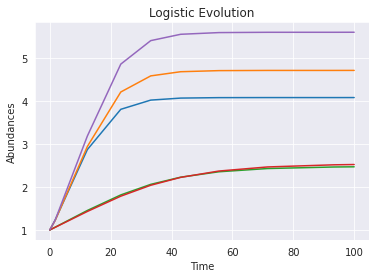

In [5]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Logistic Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#   Logistic Growth with Allee Effect

In [6]:
def logalee(t, X, K, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * (1-X/K)*(X/(X+C))-m*X

In [7]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_C = rng.uniform(2, 3, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)

logalee(t=0, X=np.ones(aux_N), K=aux_K, C=aux_C, b=aux_b, m=aux_m)

array([ 0.00142558, -0.01112172, -0.00830285, -0.01811691, -0.06589169])

In [8]:
sol = intg.solve_ivp(fun=logalee, t_span=(0., 1e2), y0=np.ones(aux_N), args=(aux_K, aux_C, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

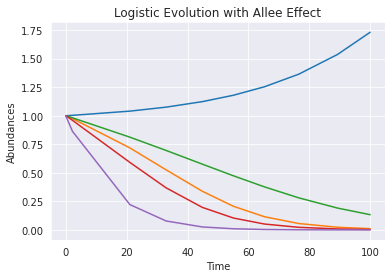

In [9]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Logistic Evolution with Allee Effect")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#  Strong competition Lotka-Volterra Model

In [10]:
def strongLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K ) - m * X

In [11]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(1.5, 1.5, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())

strongLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

array([-0.14197033, -0.09499121, -0.07168145, -0.09822602, -0.09694248])

In [12]:
sol = intg.solve_ivp(fun=strongLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

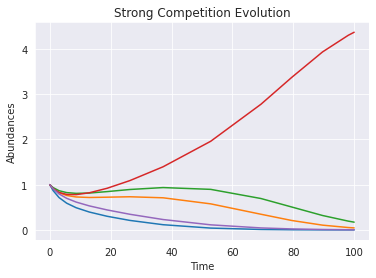

In [13]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Strong Competition Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

# Weak competition Lotka-Volterra Model

In [14]:
def weakLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K ) - m * X

In [15]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(0.1, 0.1, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())

weakLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

array([0.13753913, 0.13670525, 0.13902213, 0.07236664, 0.15212297])

In [16]:
sol = intg.solve_ivp(fun=weakLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

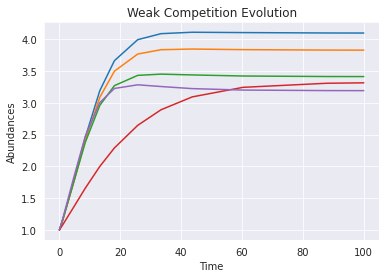

In [17]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Weak Competition Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#  Facilitation Lotka-Volterra Model

In [18]:
def facilLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K + (A @ X))/K ) - m * X

In [19]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(0.1, 0.1, size=(aux_N, aux_N))
aux_A += np.diag(-np.ones(aux_N)) -np.diag(aux_A.diagonal())
print(aux_A)
facilLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

[[-1.   0.1  0.1  0.1  0.1]
 [ 0.1 -1.   0.1  0.1  0.1]
 [ 0.1  0.1 -1.   0.1  0.1]
 [ 0.1  0.1  0.1 -1.   0.1]
 [ 0.1  0.1  0.1  0.1 -1. ]]


array([0.12000436, 0.14621131, 0.11102962, 0.07876012, 0.10087195])

In [20]:
sol = intg.solve_ivp(fun=facilLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

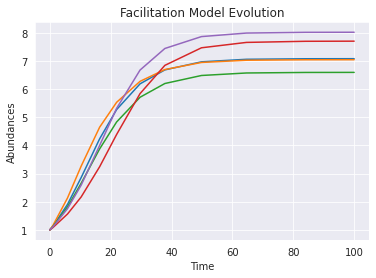

In [21]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Facilitation Model Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#   Competition/facilitation Lotka-Volterra Model

In [22]:
def compfacilLV(t, X, K, A, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K ) - m * X

In [23]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(-0.1, 0.5, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())

compfacilLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, b=aux_b, m=aux_m)

array([0.06568968, 0.18636166, 0.11123728, 0.11186045, 0.14216331])

In [24]:
sol = intg.solve_ivp(fun=compfacilLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

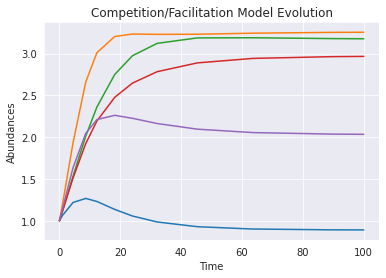

In [25]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Competition/Facilitation Model Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

#  Competition/facilitation Lotka-Volterra model with Allee Effect

In [26]:
def completeLV(t, X, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

In [27]:
aux_N = 5
aux_K = rng.uniform(5, 6, size=aux_N)
aux_C = rng.uniform(2, 3, size=aux_N)
aux_b = rng.uniform(0.3, 0.1, size=aux_N)
aux_m = rng.uniform(0, 0.1, size=aux_N)
aux_A = rng.uniform(-0.1, 0.5, size=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) -np.diag(aux_A.diagonal())

completeLV(t=0, X=np.ones(aux_N), K=aux_K, A=aux_A, C=aux_C, b=aux_b, m=aux_m)

array([-0.06242266,  0.02040005,  0.00803389,  0.00109131, -0.01845416])

In [28]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))

Text(0, 0.5, 'Abundances')

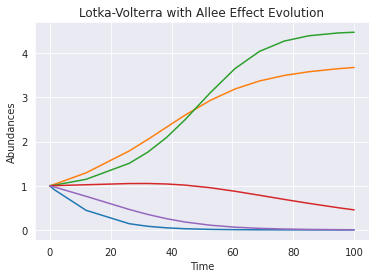

In [29]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)

plt.title("Lotka-Volterra with Allee Effect Evolution")
ax.set_xlabel("Time")
ax.set_ylabel("Abundances")

# Allometry on Equilibrium

In [40]:
def completeLV(t, X, K, A, C, b, m):
    X[X < 1e-9] = 0.
    return (X * b) * ((K - (A @ X))/K )*(X/(X+C)) - m * X

In [41]:
def scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f):
    b=eta1*M**nu1
    K=eta2*M**nu2
    A=eta3*M**nu3
    C=f*K
    m=eta4*M**nu4
    return b,K,A,C,m

In [68]:
M= np.linspace(1e-2,1e2,10000)

eta1=5.37
nu1=-0.25
eta2=1
nu2=-1
eta3=1
nu3=0
eta4=0.1
nu4=0
f=0.5

b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)

In [69]:
def pred_equilibria(A, K, b, C, m, n):
    aa = b*((n-1)*A + 1)
    bb = -(b-m)*K
    cc = m*C*K
    delta = bb*bb - 4*aa*cc
    E1=( -bb + np.sqrt(delta) )/(2*aa)
    E2=( -bb - np.sqrt(delta) )/(2*aa)
    return E1,E2

In [70]:
n=5
E1,E2=pred_equilibria(A, K, b, C, m, n)

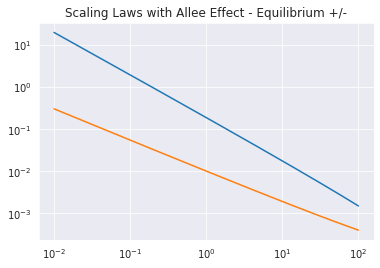

In [71]:
plt.loglog()
plt.plot(M,E1)
plt.plot(M,E2)
plt.title("Scaling Laws with Allee Effect - Equilibrium +/-")
plt.show()

In [97]:
logM = np.log(M)
logE1 = np.log(E1)
logE2 = np.log(E2)
print('Upper Limit')
params,cov1 = np.polyfit(logM, logE1, 1,cov=True) #m slope, c intecept (https://stackoverflow.com/questions/43837179/best-fit-line-on-log-log-scales-in-python-2-7)
print('slope: ',params[0])
print('intercept: ',params[1])
params,cov2 = np.polyfit(logM, logE2, 1,cov=True)
print('Lower Limit')
print('slope: ',params[0])
print('intercept: ',params[1])

Upper Limit
slope:  -1.0542212090681427
intercept:  -1.6332677414630437
Lower Limit
slope:  -0.6957787909318558
intercept:  -4.652730353045822


In [98]:
print(np.sqrt(cov1[0][0]),np.sqrt(cov1[1][1]))
print(np.sqrt(cov2[0][0]),np.sqrt(cov2[1][1]))

0.00015912453163060154 0.0005953087786373924
0.00015912453163059923 0.0005953087786373839


# Allometry on Dynamic Equations

In [36]:
M= 1

eta1=5.37
nu1=-0.25
eta2=1
nu2=-1
eta3=1
nu3=0
eta4=0.1
nu4=0
f=0.5

b,K,A,C,m=scaling(M, nu1, eta1, nu2, eta2, nu3, eta3, nu4, eta4, f)

In [37]:
aux_N=5
aux_b = b*np.ones(aux_N)
aux_K = K*np.ones(aux_N)
aux_A = A*np.ones(shape=(aux_N, aux_N))
aux_A += np.diag(np.ones(aux_N)) - np.diag(aux_A.diagonal())
aux_C = C*np.ones(shape=aux_N)
aux_m = m*np.ones(aux_N)

In [38]:
sol = intg.solve_ivp(fun=completeLV, t_span=(0., 1e2), method="Radau", y0=np.ones(aux_N), args=(aux_K, aux_A, aux_C, aux_b, aux_m))